<a href="https://colab.research.google.com/github/rtajeong/M4_new/blob/main/lab_07_keras_examples_iris_kfold_callback_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More on Keras
- from "모두의 딥러닝"

# 12. Multinomial classification
- iris data
- one-hot encoding
- softmax
- K-fold cross validation

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
np.random.seed(17)
iris_data = sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_data.shape

(150, 5)

In [5]:
dataset = iris_data.values
X = dataset[:,0:4].astype('float')
Y_obj = dataset[:,4]

Y = LabelEncoder().fit_transform(Y_obj)
Y_encoded = utils.to_categorical(Y)   #  one-hot encoding

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2)

In [6]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [7]:
# model and compile & train & predict(evaluate)
model = Sequential()
# model.add(Dense(16,  input_dim=4, activation='relu'))
model.add(Dense(16,  input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=100,
                    batch_size=32, verbose=0)
model.save('iris_model.h5')     # or model.save('iris_model_dir')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [10]:
from keras.models import load_model
del model   # delete existing models in memory
model = load_model('iris_model.h5')  # newly call the model
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

1/1 [==============================] - 0s 161ms/step - loss: 0.5388 - accuracy: 0.8333

 Accuracy: 0.8333


In [11]:
model.evaluate(X_test, Y_test)     # loss, accuracy

1/1 [==============================] - 0s 31ms/step - loss: 0.5388 - accuracy: 0.8333


[0.5388433337211609, 0.8333333134651184]

In [ ]:
X.shape, Y.shape

((150, 4), (150,))

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

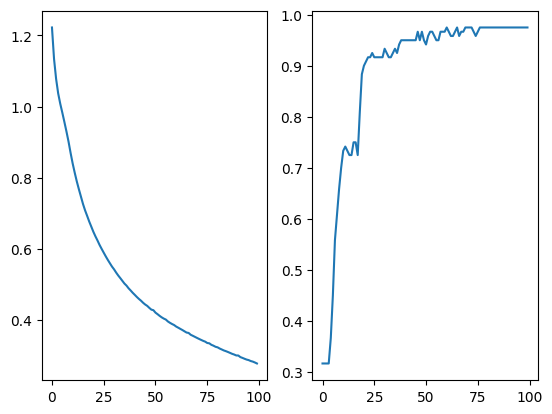

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 46ms/step - loss: 0.3575 - accuracy: 0.9333


[0.35750478506088257, 0.9333333373069763]

In [ ]:
X_test[0]

array([5.4, 3.9, 1.3, 0.4])

In [ ]:
model.predict(X_test)[0]

1/1 [==============================] - 0s 32ms/step


array([9.8314673e-01, 1.6257061e-02, 5.9624226e-04], dtype=float32)

In [ ]:
Y_pred = model.predict(X_test)
tf.math.confusion_matrix(Y_test.argmax(1), Y_pred.argmax(1))

1/1 [==============================] - 0s 21ms/step


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 7,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]], dtype=int32)>

# K-fold cross validation
- Keras does not have a direct equivalent to 'cross_val_score()' from sklearn.

### Manual implement
- full control

In [ ]:
X.shape, Y.shape

((150, 4), (150,))

In [ ]:
from sklearn.model_selection import StratifiedKFold

model = Sequential()
model.add(Dense(16,  input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

n_fold = 5
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=17)

cvscores = []
for train_index, test_index in skf.split(X, Y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    y_train_enc = utils.to_categorical(y_train)
    y_test_enc = utils.to_categorical(y_test)

    model.fit(X_train, y_train_enc, epochs=30, batch_size=5, verbose=0)
    score = model.evaluate(X_test, y_test_enc, verbose=0)
    cvscores.append(score)

In [ ]:
model.metrics_names, cvscores, np.mean(cvscores, axis=0)

(['loss', 'accuracy'],
 [[0.39767298102378845, 0.9333333373069763],
  [0.33935242891311646, 0.9666666388511658],
  [0.3483627438545227, 0.9666666388511658],
  [0.3515993654727936, 1.0],
  [0.40204423666000366, 0.9333333373069763]],
 array([0.36780635, 0.95999999]))

### Using KerasClassifier wrapper

- We can use scikit-learn in conjunction with Keras to perform K-fold cross-validation.
- easy and seamless integration with familiar interface
- KerasClassifier():
  - it allows you to use a Keras model as an estimator in scikit-learn.
  - This means you can apply scikit-learn's powerful tools for tasks like hyperparameter tuning, cross-validation, and more, while leveraging the capabilities of Keras for deep learning.

In [ ]:
!pip install scikeras

In [ ]:
X.shape, Y_encoded.shape

((150, 4), (150, 3))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple Keras model function
def create_model():
    model = Sequential()
    model.add(Dense(16,  input_shape=(4,), activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Wrap the Keras model
model = KerasClassifier(model=create_model, epochs=30, batch_size=10, verbose=0)

# Define K-fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-fold cross-validation
results = cross_val_score(model, X, Y_encoded, cv=kfold)

# Print the results
print(results)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.96666667 0.86666667 0.86666667 0.66666667 0.93333333]
Accuracy: 86.00% (10.41%)


- which one to choose?
  - it's recommended to validate your choice through experimentation and performance evaluation on your specific dataset and task.

# 14. Callback - check point and early stopping
- Callback 함수: 어떤 event 가 발생했을 때 호출되는 함수

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf

- download wine.csv from https://codedragon.tistory.com/9480
  - class 1: red wine, 0: white wine

In [ ]:
df_all = pd.read_csv('wine.csv', header=None)
df = df_all.sample(frac=0.2)  # get only 20% of dataset
df.shape

(1299, 13)

In [ ]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
6076,6.4,0.32,0.26,7.9,0.05,53.0,180.0,0.99514,3.14,0.5,9.6,5,0


In [ ]:
df[12].value_counts()

0    966
1    333
Name: 12, dtype: int64

In [ ]:
dataset = df.values
X, y = dataset[:,0:12], dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu')) # input_shape=(12,)
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장 (epoch 마다)
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)  # record only when imrpoved

# 테스트 오차가 줄지 않으면 학습 자동 중단 설정 (모니터할 값 저장)
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=100) # 좋아지지 않아도 몇 번까지 기다릴것인지

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________



Epoch 1: val_loss improved from inf to 13.14867, saving model to ./model/01-13.1487.hdf5

Epoch 2: val_loss improved from 13.14867 to 3.20113, saving model to ./model/02-3.2011.hdf5

Epoch 3: val_loss improved from 3.20113 to 1.84401, saving model to ./model/03-1.8440.hdf5

Epoch 4: val_loss improved from 1.84401 to 1.09263, saving model to ./model/04-1.0926.hdf5

Epoch 5: val_loss improved from 1.09263 to 0.71993, saving model to ./model/05-0.7199.hdf5

Epoch 6: val_loss improved from 0.71993 to 0.66172, saving model to ./model/06-0.6617.hdf5

Epoch 7: val_loss improved from 0.66172 to 0.63528, saving model to ./model/07-0.6353.hdf5

Epoch 8: val_loss improved from 0.63528 to 0.62349, saving model to ./model/08-0.6235.hdf5

Epoch 9: val_loss improved from 0.62349 to 0.60933, saving model to ./model/09-0.6093.hdf5

Epoch 10: val_loss improved from 0.60933 to 0.59768, saving model to ./model/10-0.5977.hdf5

Epoch 11: val_loss improved from 0.59768 to 0.59340, saving model to ./model/11

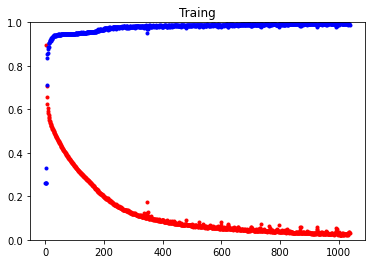

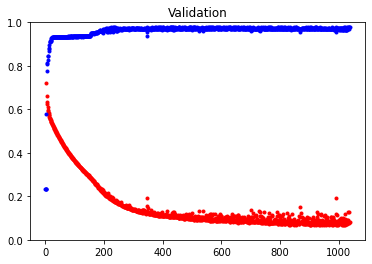

In [ ]:
y_loss, y_acc, y_vloss, y_vacc = [], [], [], []

history = model.fit(X, y, validation_split=0.2,
                    epochs=2000, batch_size=100, verbose=0,
                    callbacks=[early_stopping_callback,checkpointer])
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
x_len = np.arange(len(y_acc))
plt.ylim(0.,1.)
plt.title("Traing")
plt.plot(x_len, y_loss, "o", c="r", markersize=3)
plt.plot(x_len, y_acc, "o", c="b", markersize=3)
plt.show()
plt.title("Validation")
plt.ylim(0.,1.)
plt.plot(x_len, y_vloss, "o", c="r", markersize=3)
plt.plot(x_len, y_vacc, "o", c="b", markersize=3)
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print("Acuracy: %.4f" %(model.evaluate(X, y)[1]))

41/41 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9923
Acuracy: 0.9923


- 2000 epoch 전에 중간에 중단됨을 알 수 있다.

# Regression - boston house price
- boston area house price estimates

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf

In [ ]:
from sklearn.datasets import load_boston
house = load_boston()
X, y = house.data, house.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# house

In [ ]:
X.shape, y.shape

((506, 13), (506,))

In [ ]:
[i for i in dir(house) if not i.startswith("_")]

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [ ]:
house.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
X[:5], y[:5]

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
         1.5300e+01, 3.9690e+02, 4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9283e+02, 4.0300e+00],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
         6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
         1.8700e+01, 3.9463e+02, 2.9400e+00],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
         7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
         1.8700e+01, 3.9690e+02, 5.3300e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2]))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))    # no need of activation function
model.summary()
model.compile(loss='mse',
              optimizer='adam')

history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                420       
                                                                 
 dense_9 (Dense)             (None, 6)                 186       
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history.keys()

dict_keys(['loss'])

In [ ]:
model.predict(X_test)[:5], model.predict(X_test)[:5].flatten()

5/5 [==============================] - 0s 2ms/step


(array([[25.32094 ],
        [18.523514],
        [ 4.635003],
        [18.500578],
        [30.243574]], dtype=float32),
 array([25.32094 , 18.523514,  4.635003, 18.500578, 30.243574],
       dtype=float32))

In [ ]:
# just for checking
model.predict(X_test)[:5][:,0] == model.predict(X_test)[:5].flatten()

5/5 [==============================] - 0s 2ms/step


array([ True,  True,  True,  True,  True])

In [ ]:
# 예측 값과 실제 값의 비교
y_pred = model.predict(X_test).flatten()
for i in range(10):
    label = y_test[i]
    prediction = y_pred[i]
    print("real price: {:.3f}, predicted price: {:.3f}".format(label, prediction))

5/5 [==============================] - 0s 2ms/step
real price: 27.900, predicted price: 25.321
real price: 17.100, predicted price: 18.524
real price: 8.800, predicted price: 4.635
real price: 21.000, predicted price: 18.501
real price: 29.600, predicted price: 30.244
real price: 24.800, predicted price: 23.706
real price: 22.900, predicted price: 24.338
real price: 18.700, predicted price: 19.134
real price: 30.800, predicted price: 30.100
real price: 18.200, predicted price: 17.025


In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 9.6770


9.676989555358887

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, model.predict(X_test)))
print(tf.metrics.mean_squared_error(y_test, model.predict(X_test))[0])

5/5 [==============================] - 0s 2ms/step
0.8735885586239343
5/5 [==============================] - 0s 2ms/step
tf.Tensor(93.540054, shape=(), dtype=float32)


In [ ]:
y_test.shape, model.predict(X_test).shape

5/5 [==============================] - 0s 2ms/step


((152,), (152, 1))

# Exercise (연습)
- tf.function:
  - 내부에서 tf 1.x 처럼 graph 와 execution 이 분리되어 실행됨.
  - 그래프에 작은 연산이 많을 때 eager execution 모드 보다 빠르다고 알려져 있지만 (합성곱처럼) 계산량이 많은 연산 몇 개로 이루어진 그래프는 속도 향상이 없어 보임.
  - 디버깅이 어려워 모든 함수 동작이 확인된 후 붙이는 게 좋음.

In [ ]:
# tf.function: Compiles a function into a callable TensorFlow graph.
#               (must be faster), but not always...?
import timeit
@tf.function
def dense_layer1(x, w, b):
    return tf.add(tf.matmul(x, w), b)

%time dense_layer1(tf.ones([3, 2]), tf.ones([2, 2]), tf.ones([2]))

CPU times: user 42.8 ms, sys: 1.91 ms, total: 44.7 ms
Wall time: 45.3 ms


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.],
       [3., 3.]], dtype=float32)>

In [ ]:
def dense_layer2(x, w, b):
    return tf.add(tf.matmul(x, w), b)

%time dense_layer2(tf.ones([3, 2]), tf.ones([2, 2]), tf.ones([2]))

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.51 ms


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.],
       [3., 3.]], dtype=float32)>

In [ ]:
import timeit
conv_layer = tf.keras.layers.Conv2D(100, 3)

@tf.function
def conv_fn(image):
  return conv_layer(image)

image = tf.zeros([1, 200, 200, 100])
# 워밍 업
conv_layer(image); conv_fn(image)
print("Eager execution convolution:", timeit.timeit(lambda: conv_layer(image), number=10))
print("tf.function convolution:", timeit.timeit(lambda: conv_fn(image), number=10))
print("no difference between these two to execute convolution !")

Eager execution convolution: 0.013682682999842655
tf.function convolution: 0.01231922199986002
no difference between these two to execute convolution !
